In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

In [89]:
#1 . 
books['original_title'].isnull().sum()

36

In [90]:
#2.
books = books.dropna(subset = ['original_title'])

In [91]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')

In [92]:
book_tags.columns

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')

In [93]:
books['book_id'].nunique()

363

In [94]:
book_tags.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [95]:
book_tags['goodreads_book_id'].nunique()

402

In [96]:
ratings.columns

Index(['user_id', 'book_id', 'rating'], dtype='object')

In [97]:
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [98]:
ratings['book_id'].nunique()

399

In [99]:
ratings['user_id'].isnull().sum()

0

In [100]:
ratings['user_id'].duplicated().sum()

192547

In [101]:
ratings['user_id'].drop_duplicates().sum()

1030290824

In [102]:
ratings['user_id'].duplicated().sum()


192547

In [103]:
#3.
ratings['user_id'].nunique()

40836

In [104]:
#4.
book_tags.nunique()

goodreads_book_id     402
tag_id               3651
count                1439
dtype: int64

In [105]:
most_used = book_tags['tag_id'].value_counts().idxmax()

In [106]:
most_used

4600

In [107]:
#5.
print(f"the most frequently used tag_id is {most_used}")

the most frequently used tag_id is 4600


In [108]:
#6
book_tags = book_tags.rename(columns={'goodreads_book_id':'book_id'})

In [109]:
merged_df = pd.merge(books, book_tags, on='book_id')
tag_counts_per_book = merged_df.groupby('title')['tag_id'].count()
most_tagged_book_title = tag_counts_per_book.idxmax()
print(f"The book with the most number of counts of tags is: {most_tagged_book_title}")

The book with the most number of counts of tags is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


In [110]:
#7.
tag_user_records = book_tags.groupby('tag_id')['book_id'].count()
top_tags = tag_user_records.sort_values(ascending=False).head(20)

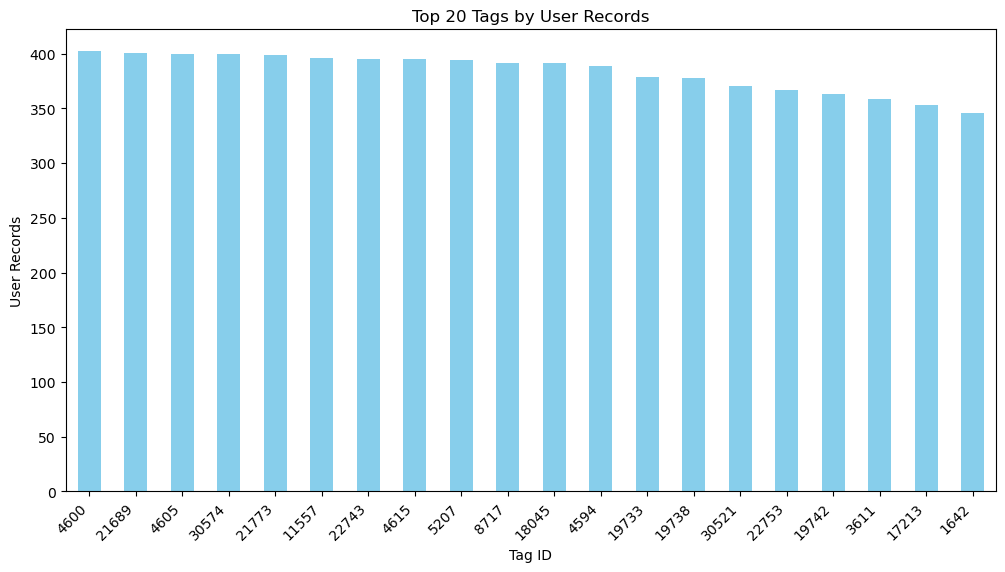

In [111]:
plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.xticks(rotation=45, ha='right')
plt.show()